# Boston Crime Data Analysis

In [1]:
# Import necessary packages
from sklearn.cluster import KMeans
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt
%matplotlib inline

The data below was pulled from https://www.kaggle.com/ankkur13/boston-crime-data.

This dataset has 300,000+ rows and 17 columns. This notebook will go through observations made in the data.

Columns:
    INCIDENT_NUMBER,
    OFFENSE_CODE,
    OFFENSE_CODE_GROUP,
    OFFENSE_DESCRIPTION,
    DISTRICT,
    REPORTING_AREA,
    SHOOTING,
    OCCURRED_ON_DATE,
    YEAR,
    MONTH,
    DAY_OF_WEEK,
    HOUR,
    UCR_PART,
    STREET,
    LATITUDE,
    LONGITUDE,
    LOCATION

In [2]:
df = pd.read_csv('_crime.csv')
df.head()

/home/tyler23/anaconda3/envs/first/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3057: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)"
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)"
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)"
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)"
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)"


In [3]:
df['newDate'] = df.OCCURRED_ON_DATE.str[:7]
df['newDate'] = pd.to_datetime(df.newDate) # Converting column to datetime
df.newDate.head()

0   2018-10-01
1   2018-08-01
2   2018-10-01
3   2018-10-01
4   2018-10-01
Name: newDate, dtype: datetime64[ns]

## Boston crime data time series

/home/tyler23/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Time')

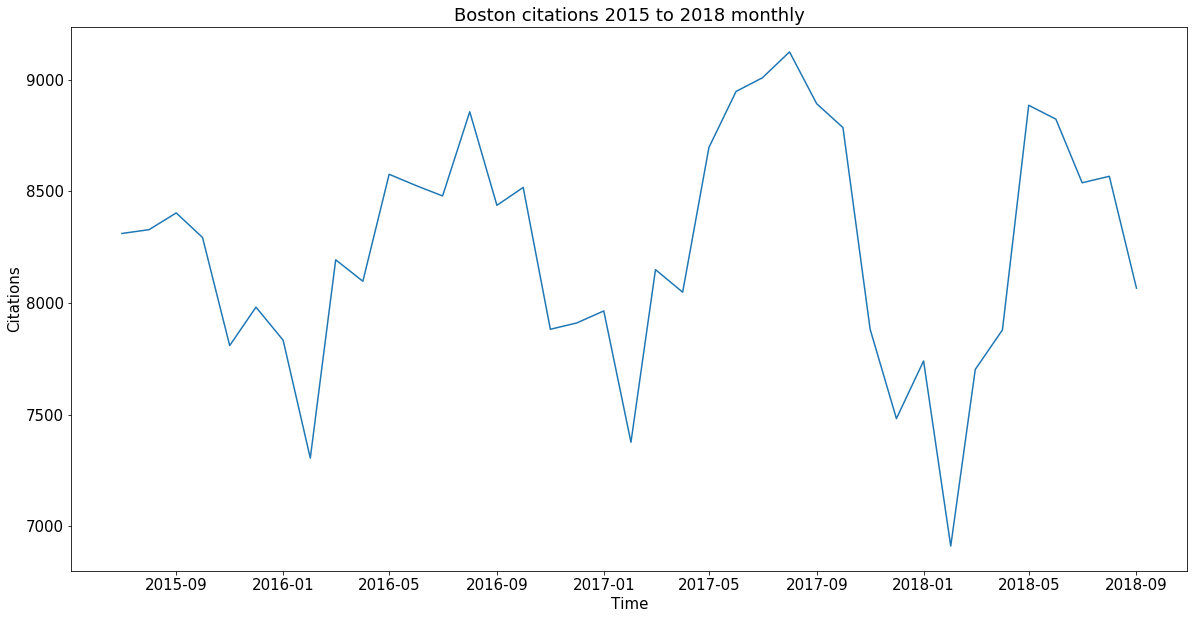

In [4]:
'''
    The following model compares the independent variable, time, to the dependent variable, total number of offenses.
'''

fontop = {'size':15}            #increasing the font size for illustrative purposes
plt.rc('figure',figsize=(20,10))
plt.rc('font',**fontop)
fig,ax = plt.subplots()

freq = df[['newDate','DISTRICT']] # Grabbing the date and District columns
dfT = pd.DataFrame(freq.groupby('newDate').DISTRICT.count()) # Count number of offenses per day
dfT = dfT[1:-1] # Remove outliers (first and last)

ax.plot(dfT.index,dfT.DISTRICT) # Graph it
ax.set_title('Boston citations 2015 to 2018 monthly')
ax.set_ylabel('Citations')
ax.set_xlabel('Time')

### ***Conclusion***

The citations rise in the summer time in Boston and then fall right after the new year. 
This pattern can be seen over the course of three years.

## Boston crime by day of the week

(37236.6, 52245.9)

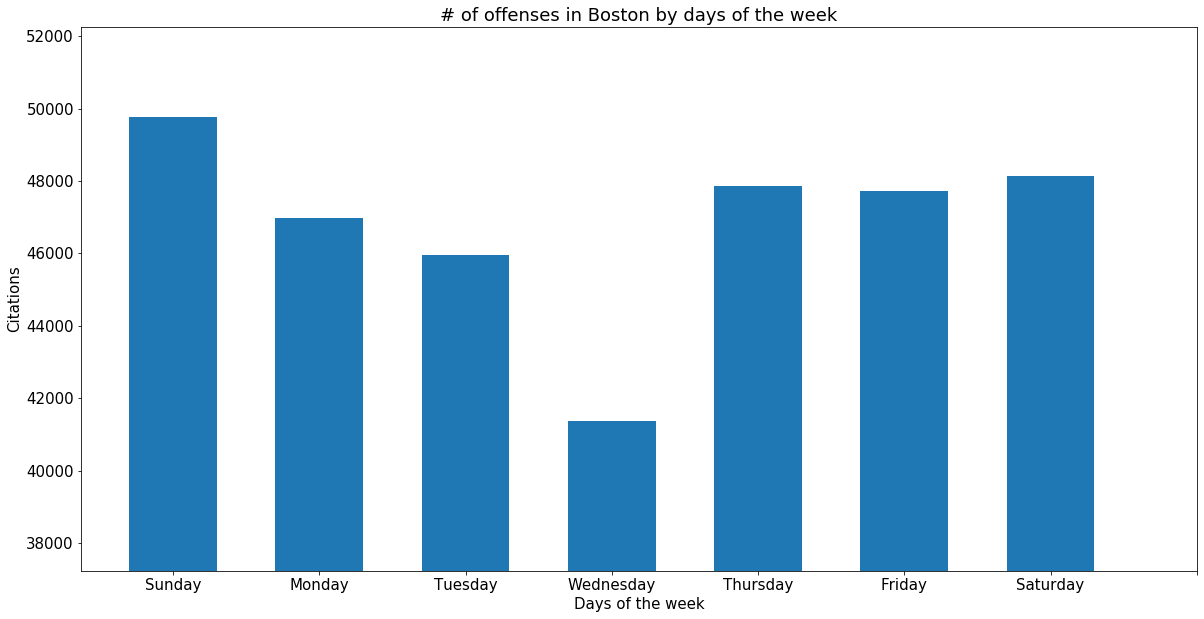

In [5]:
'''
    The next model displays the amount of crime over the last three years in Boston each day of the week.
'''

dayoffense = df.groupby('DAY_OF_WEEK').OFFENSE_DESCRIPTION.count()
dayoffense

fontop = {'size':15}            #increasing the font size for illustrative purposes
plt.rc('figure',figsize=(20,10))
plt.rc('font',**fontop)
fig , ax = plt.subplots()

dfD = pd.DataFrame(dayoffense)
dfD

ax.bar(dfD.index,dfD['OFFENSE_DESCRIPTION'],width=.6)
ax.set_xlabel('Days of the week')
ax.set_title('# of offenses in Boston by days of the week')
ax.set_xticks(np.arange(8))
ax.set_xticklabels(('Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday'))
ax.set_ylabel('Citations')
plt.ylim(bottom=dfD.OFFENSE_DESCRIPTION.min()-(dfD.OFFENSE_DESCRIPTION.min()*0.1))

### ***Conclusion***

Sunday was the worst day for crime in Boston from 2015 to 2018.

## Finding hotspots in Boston

In [6]:
'''
    Variable 'hotspots' is a count of all crime happening on the streets of Boston.
'''

hotspots = pd.DataFrame(df.groupby('STREET').DISTRICT.count()).sort_values(by='DISTRICT',ascending=False).head(8)
hotspots

,DISTRICT
STREET,
WASHINGTON ST,14588
BLUE HILL AVE,8002
BOYLSTON ST,7423
DORCHESTER AVE,5291
TREMONT ST,4925
MASSACHUSETTS AVE,4864
HARRISON AVE,4738
CENTRE ST,4483


/home/tyler23/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if sys.path[0] == '':


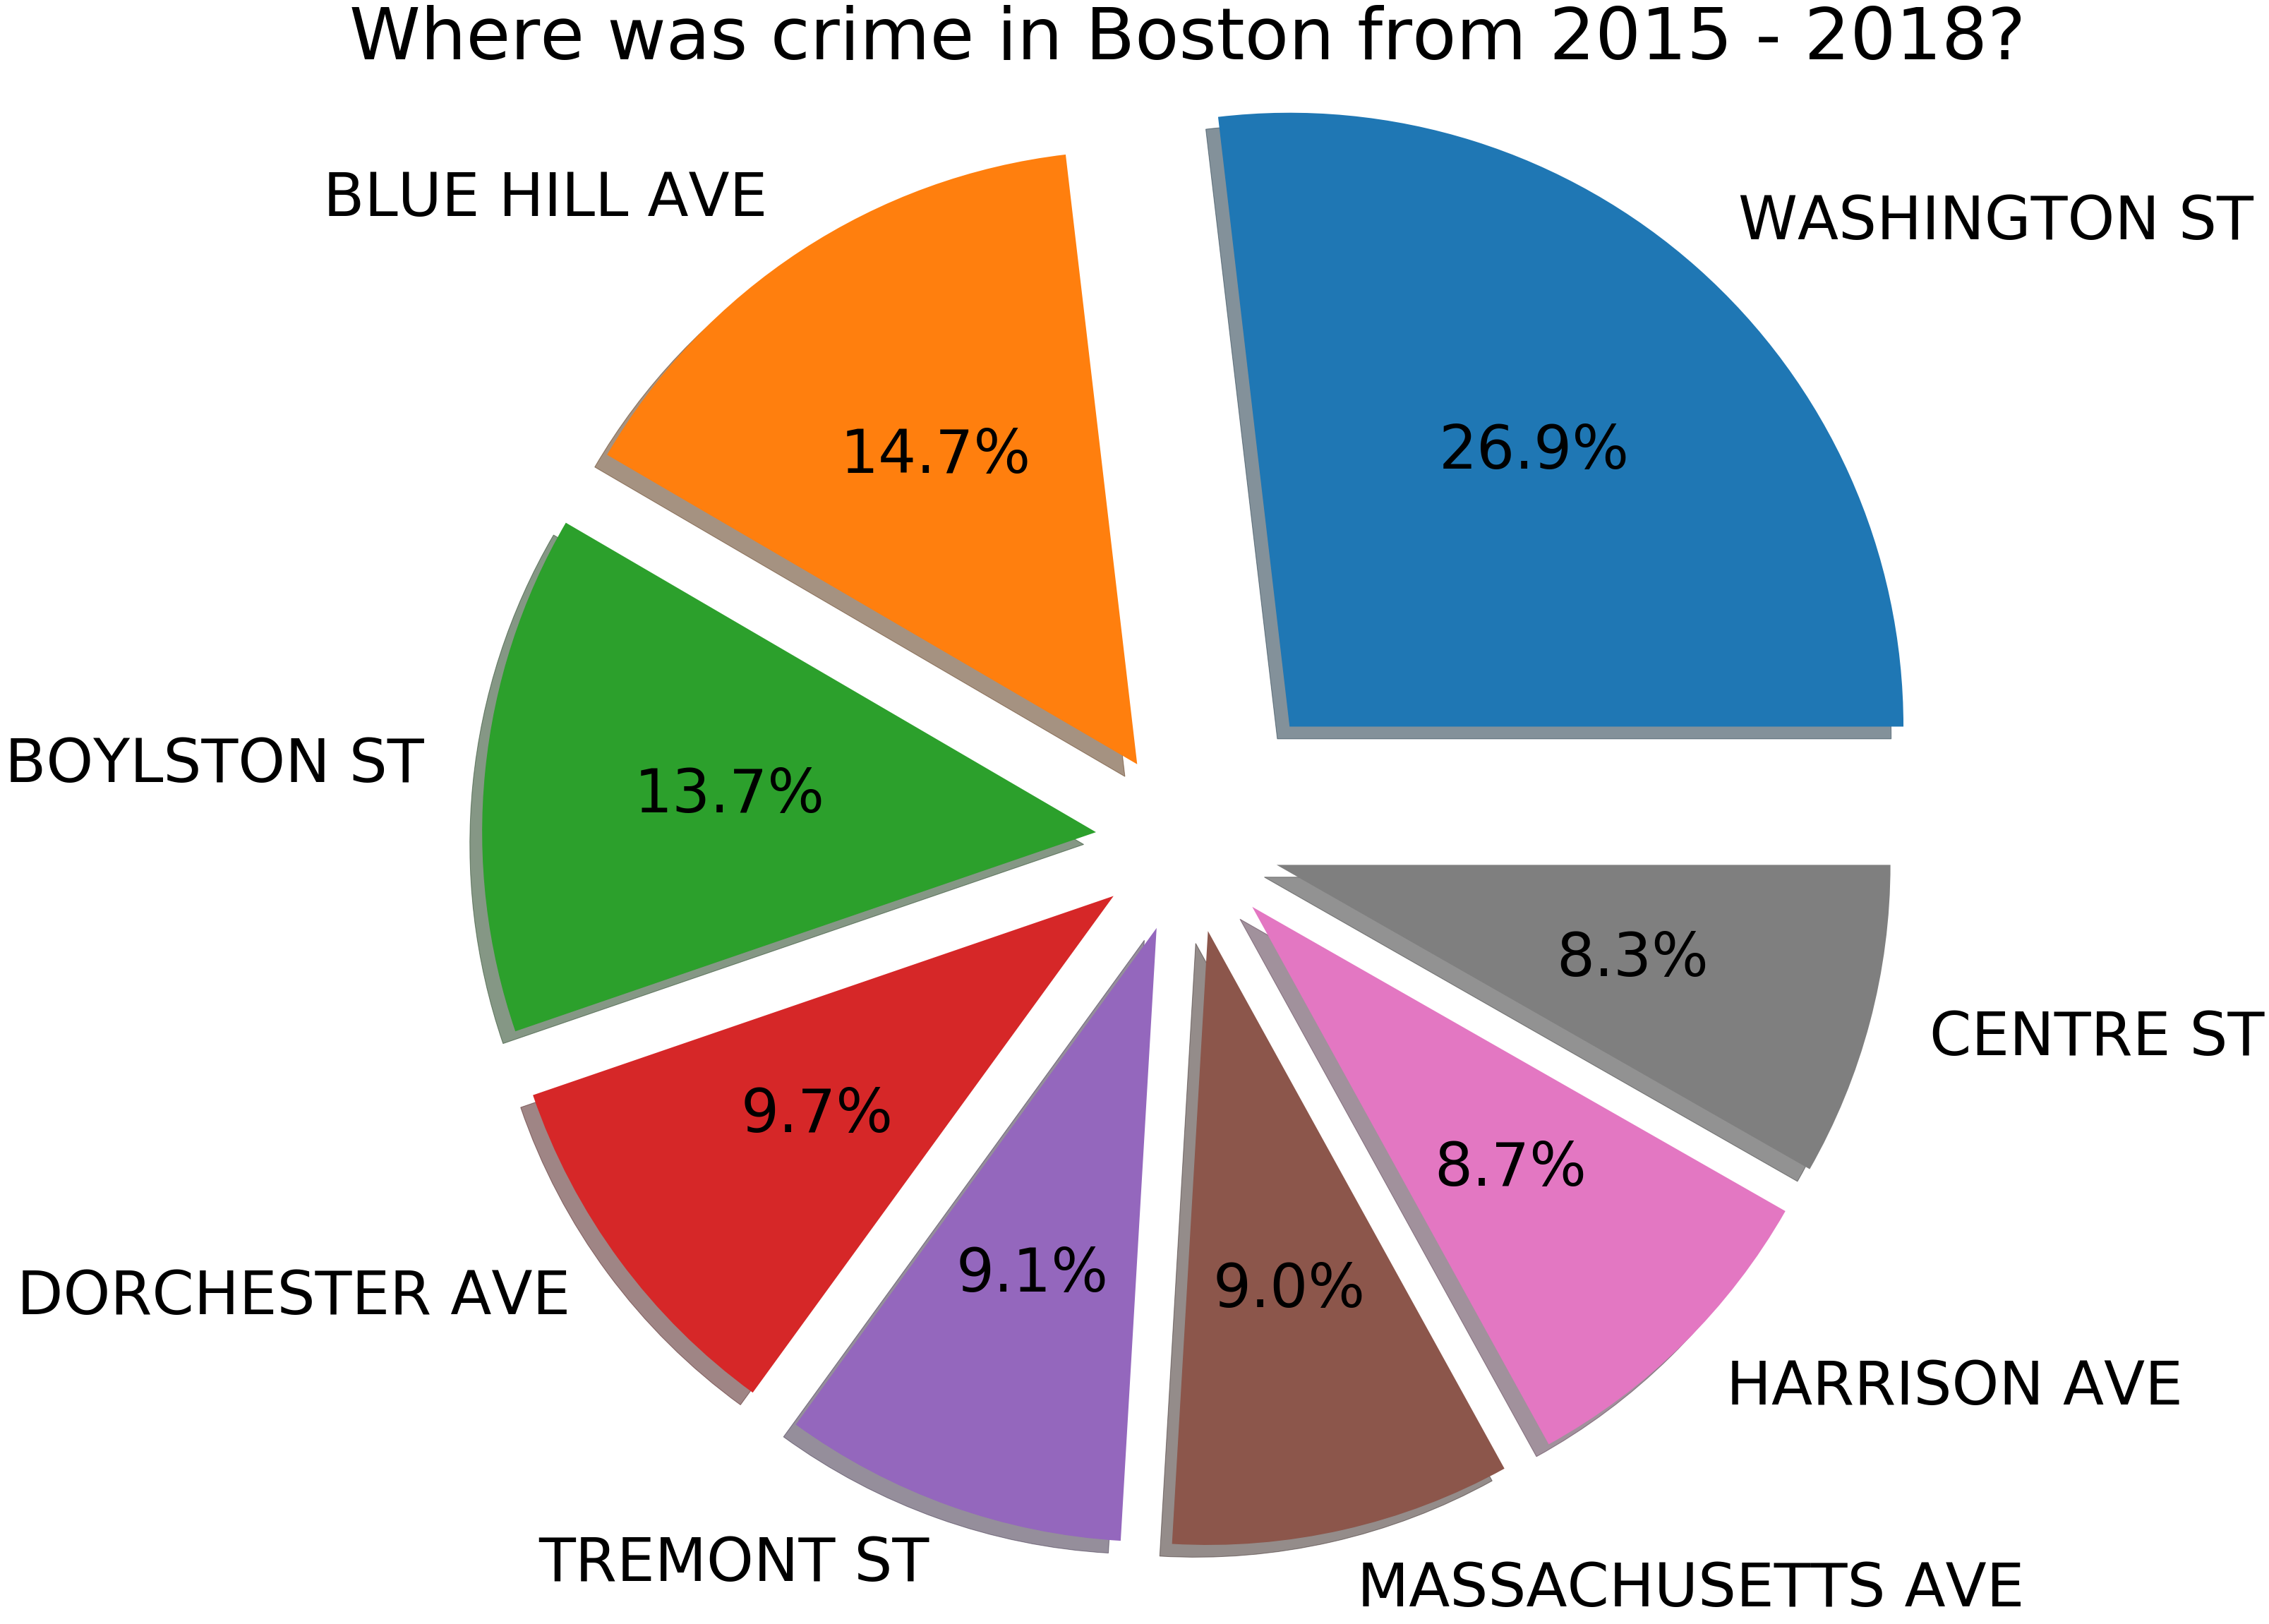

In [28]:
labels = list(hotspots.index)
explode = []
for i in labels:
    if (i == 'WASHINGTON ST'):
        explode.append(.25)   #making greatest slice stand out
    else:
        explode.append(0.15)  #setting the 'explode' to each slice
        
plt.figure()
plt.pie(hotspots,labels=labels,
       autopct = '%1.1f%%',
        explode = explode,shadow = True,)
fontop = {'size':85}            #increasing the font size for illustrative purposes
plt.rc('figure',figsize=(40,40))
plt.rc('font',**fontop)
plt.title('Where was crime in Boston from 2015 - 2018?')
plt.show()

### ***Conclusion***

Washington Street in Boston, MA had the most crime reported from 2015 to 2018. 

## Most common crime

In [8]:
commons = pd.DataFrame(df.groupby('OFFENSE_CODE_GROUP').DISTRICT.count()) \
    .sort_values(by='DISTRICT', ascending=False).head(10)

commons.rename(columns={'DISTRICT':'TOTAL_CRIMES'},inplace=True)
commons

,TOTAL_CRIMES
OFFENSE_CODE_GROUP,
Motor Vehicle Accident Response,37672
Larceny,26590
Medical Assistance,24159
Investigate Person,19102
Other,18525
Drug Violation,16870
Simple Assault,16223
Vandalism,15761
Verbal Disputes,13465


### ***Conclusion***

Motor vehicle accidents are the most common law enforcement responses in Boston, followed by larceny and medical assistance.

## Revisiting Washington Street...

In [9]:
wc = df[df['STREET'] == 'WASHINGTON ST']
WC = pd.DataFrame(wc.groupby('OFFENSE_CODE_GROUP').DISTRICT.count()).sort_values(by='DISTRICT', ascending=False).head(3)

WC.rename(columns={'DISTRICT':'OCCURANCES'},inplace=True)
WC

,OCCURANCES
OFFENSE_CODE_GROUP,
Larceny,1973
Drug Violation,1248
Motor Vehicle Accident Response,1159


### ***Conclusion***

Larceny is the most common crime on Washington Street in Boston, followed by drug violations and car accidents.

## Find central theft locations using KMeans clustering by scikit-learn for Unsupervised Machine Learning

### Goal: Identify the Lat/Long(s) hot spots for larceny

This section derives central locations for theft in Boston by providing an unsupervised model with the latitude and longititude of all larceny crime.

In [4]:
df[df['OFFENSE_CODE_GROUP'] == 'Larceny'][['STREET','OFFENSE_DESCRIPTION', 'Lat', 'Long']].head()

,STREET,OFFENSE_DESCRIPTION,Lat,Long
21,HUNTINGTON AVE,LARCENY SHOPLIFTING,42.347972,-71.078496
24,AKRON ST,LARCENY ALL OTHERS,42.325794,-71.085638
47,W BROADWAY,LARCENY SHOPLIFTING,42.336112,-71.046654
54,CAMBRIDGE ST,LARCENY ALL OTHERS,42.361110,-71.067414
56,REV RICHARD A BURKE ST,LARCENY THEFT FROM BUILDING,42.331920,-71.052108


In [5]:
avg_lat = df[df['OFFENSE_CODE_GROUP'] == 'Larceny'].Lat.mean()
avg_lon = df[df['OFFENSE_CODE_GROUP'] == 'Larceny'].Long.mean()
print("LAT: {}\nLON: {}".format(avg_lat, avg_lon))

LAT: 42.236175105392626
LON: -70.92416170752438


Centroid of larceny in Boston

### *Prepare data*

Gather all larceny (theft) crimes in the Boston data set.

In [6]:
theftDF = df[df['OFFENSE_CODE_GROUP'] == 'Larceny'].copy() # Grab all larceny crimes
values = {'Lat':theftDF.Lat.mean(), 'Long':theftDF.Long.mean()} # Replace NaN's with means
theftDF.fillna(value=values, inplace=True)

### Process the data by analyzing how many clusters are ideal
    
Use KMeans clustering to derive an optimal number of clusters in the data. That is, find an 'n' number of clusters in the latitude/longitude coordinates. The elbow point of the graph is the optimum number of clusters.
    
*Note: Code in the next two cells was taken from user (former professor) "Abezuglov" on GitHub in
   notebook '08 -- Unsupervised learning, part 1 Clustering.ipynb'*

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 

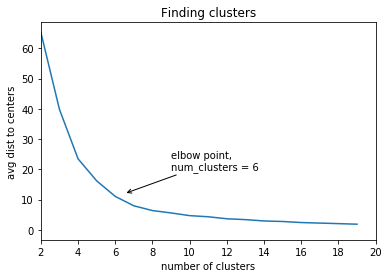

In [11]:
max_n_clusters = 20
squared_distance = np.zeros(max_n_clusters)
for k in range(2,max_n_clusters):
    kmeans = KMeans(n_clusters = k, random_state = 0).fit(theftDF[['Lat','Long']])  # Unsupervised machine learning portion
    squared_distance[k] = kmeans.inertia_
    print(k,sep=' ', end=' ', flush=True)

plt.figure()
plt.plot(squared_distance)
plt.xlim((2,max_n_clusters))
plt.xlabel('number of clusters')
plt.ylabel('avg dist to centers')
plt.title('Finding clusters')
plt.annotate("elbow point,\nnum_clusters = 6", xy=(6.5, 12), xytext=(9, 20), arrowprops={'arrowstyle':"->"})
plt.show()

### *Conclusion*

The model determined there are about **six clusters** found in the data and can be represented by the following average coordinates.

In [20]:
n_clusters = 6 # 6 clusters is the best
geo = KMeans(n_clusters = n_clusters, random_state = 1)
geo.fit(theftDF[['Lat','Long']]) # Unsupervised machine learning portion

theftDF['cluster'] = geo.labels_

cluster_coords = theftDF.groupby('cluster')[['Lat','Long']].mean().to_dict('records')

print("\tLAT\t\t    LONG")
i = 1
for cc in cluster_coords:
    print("{}. {}, {}".format(i, cc['Lat'], cc['Long']))
    i+=1

	LAT		    LONG
1. 42.35132493539136, -71.06696495211132
2. -1.0, -1.0
3. 42.306165723105714, -71.07086562901941
4. 42.33865746069054, -71.11564918788503
5. 42.23617510539321, -70.92416170752408
6. 42.271345943468944, -71.1232138888684


In [15]:
print('Caveat that -1, -1 exists because of 58 rows in data have locations of (-1,-1)')
theftDF[theftDF['Lat'] == -1].shape[0]

Caveat that -1, -1 exists because of 58 rows in data have locations of (-1,-1)


58

### Visual Representation

Here are the central locations the unsupervised model determined were hotspots for theft in Boston from 2015 - 2018.

<img src="img/boston1.PNG?raw=true" width="100%"></img>

<img src="img/boston_legend1.PNG?raw=true"></img>

## Crime classification using DecisionTreeClassifier by scikit-learn for Supervised machine learning 

### Goal: Predict the crime offense based on the offense's information.

In [16]:
df.head()

,INCIDENT_NUMBER,OFFENSE_CODE,OFFENSE_CODE_GROUP,OFFENSE_DESCRIPTION,DISTRICT,REPORTING_AREA,SHOOTING,OCCURRED_ON_DATE,YEAR,MONTH,DAY_OF_WEEK,HOUR,UCR_PART,STREET,Lat,Long,Location,newDate
0,I182080058,2403,Disorderly Conduct,DISTURBING THE PEACE,E18,495,NaN,2018-10-03 20:13:00,2018,10,Wednesday,20,Part Two,ARLINGTON ST,42.262608,-71.121186,"(42.26260773, -71.12118637)",2018-10-01
1,I182080053,3201,Property Lost,PROPERTY - LOST,D14,795,NaN,2018-08-30 20:00:00,2018,8,Thursday,20,Part Three,ALLSTON ST,42.352111,-71.135311,"(42.35211146, -71.13531147)",2018-08-01
2,I182080052,2647,Other,THREATS TO DO BODILY HARM,B2,329,NaN,2018-10-03 19:20:00,2018,10,Wednesday,19,Part Two,DEVON ST,42.308126,-71.076930,"(42.30812619, -71.07692974)",2018-10-01
3,I182080051,413,Aggravated Assault,ASSAULT - AGGRAVATED - BATTERY,A1,92,NaN,2018-10-03 20:00:00,2018,10,Wednesday,20,Part One,CAMBRIDGE ST,42.359454,-71.059648,"(42.35945371, -71.05964817)",2018-10-01
4,I182080050,3122,Aircraft,AIRCRAFT INCIDENTS,A7,36,NaN,2018-10-03 20:49:00,2018,10,Wednesday,20,Part Three,PRESCOTT ST,42.375258,-71.024663,"(42.37525782, -71.02466343)",2018-10-01


### *Preprocessing*

In [17]:
# Preprocess step in encoding categorical data
le = preprocessing.LabelEncoder()
def label_col(column, learn):
    if learn[column].dtype == object:
        print(column+' is '+str(learn[column].dtype))
        learn[column] = learn[column].astype(str)
        le.fit(learn[column])
        learn['str_'+column] = le.transform(learn[column])
        learn.drop(column, axis=1, inplace=True)

In [18]:
'''
    The following are the columns the predictions will be based off of. That is, they are the criteria
    for determining the type of crime.
'''

cols = list(df.columns)
learned = [#'OFFENSE_CODE',
 'DISTRICT',
 'REPORTING_AREA',
 'YEAR',
 'MONTH',
 'DAY_OF_WEEK',     # Criteria
 'HOUR',
 'UCR_PART',
 'STREET',
 'Lat',
 'Long']
learn = df[learned]

'''
    The next step is to preprocess some of the categorical data into quantitative data for the decision tree to use.
    That is, turning words into numbers.
'''

for col in learn.columns:
    label_col(col, learn)

DISTRICT is object


/home/tyler23/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/tyler23/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/tyler23/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3940: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  err

REPORTING_AREA is object
DAY_OF_WEEK is object
UCR_PART is object
STREET is object


In [19]:
'''
    Here we collect the answers for the machine to learn.
'''
target = pd.DataFrame()
le.fit(df['OFFENSE_DESCRIPTION'])
target['str_offense_descr'] = le.transform(df['OFFENSE_DESCRIPTION'])
target.head()

,str_offense_descr
0,62
1,186
2,221
3,16
4,4


In [20]:
list(learn.columns)

['YEAR',
 'MONTH',
 'HOUR',
 'Lat',
 'Long',
 'str_DISTRICT',
 'str_REPORTING_AREA',
 'str_DAY_OF_WEEK',
 'str_UCR_PART',
 'str_STREET']

In [21]:
'''
    This step involves filling the holes in the data.
'''

values = {#'OFFENSE_CODE':0,
 'YEAR':learn.YEAR.max(),
 'MONTH':learn.MONTH.mean(),
 'HOUR':learn.HOUR.median(),
 'Lat':learn.Lat.mean(),
 'Long':learn.Long.mean(),
 'str_DISTRICT':learn.str_DISTRICT.median(),
 'str_REPORTING_AREA': learn.str_REPORTING_AREA.mode(),
 'str_DAY_OF_WEEK': learn.str_DAY_OF_WEEK.mean(),
 'str_UCR_PART':0,
 'str_STREET': learn.str_STREET.mode()}
learn.fillna(value=values,inplace=True)
learn.head()

/home/tyler23/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,YEAR,MONTH,HOUR,Lat,Long,str_DISTRICT,str_REPORTING_AREA,str_DAY_OF_WEEK,str_UCR_PART,str_STREET
0,2018,10,20,42.262608,-71.121186,10,439,6,3,240
1,2018,8,20,42.352111,-71.135311,7,770,4,2,143
2,2018,10,19,42.308126,-71.076930,3,256,6,3,1273
3,2018,10,20,42.359454,-71.059648,0,835,6,1,728
4,2018,10,20,42.375258,-71.024663,2,290,6,2,3408


### *Process*

This step is the machine learning part using a decision tree to learn the types of crimes based on the columns provided above.

In [22]:
from sklearn import tree
X = learn[:int(len(learn.index)*0.999)]
Y = target[:int(len(target.index)*0.999)] # Give > 99% of the data to the model

    # Decision Tree Model #
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X, Y) # The model fitting the data

### *Summary*

The model did not see the last 15 rows of the data. Therefore, we can use them to predict their respective
crimes and compare it to the real value to see how the model did. 
    
How did it do? How could this model be improved?

In [23]:
final = pd.DataFrame()
final['answer'] = target[327805:].str_offense_descr
final['prediction'] = clf.predict(learn.tail(15))
final['correct'] = final.answer == final.prediction
final

,answer,prediction,correct
327805,225,230,False
327806,238,238,True
327807,238,238,True
327808,13,202,False
327809,238,155,False
327810,238,213,False
327811,73,20,False
327812,72,20,False
327813,77,20,False
327814,238,123,False


After learning over 325,000 different crimes in Boston, this model produced 3 out of 15 correct predictions (equivalent to a 20% success rate).

Improving the model might consist of filling the holes in the data with a more representable value. That is, for example, if there is no day of the week given (Monday, Tuesday, etc) instead of putting zero, maybe a more reasonable number exists to replace non existent days of the week. My interpretation is, due to lack of data representing the crimes, it is going to be difficult to gain more accuracy. Maybe the DecisionTreeClassifier is not a viable option?

You may be wondering where are all the words are, the types of crimes, or even the data that produced the results. My answer to that is, it doesn't matter where it is. Surely, and maybe I should, reverse the final results to find out which category the crimes were to predicted to be. However, the accuracy of the model is what matters so we can better find out how to fine tune the model to produce better results. Mentioned above, one thing to improve might be to find a better method to filling the holes in the data. Another idea could be to normalize a column of data. Lastly, we are probably going to need more information or more crimes to analyze to make this more successful.